# AI Tango

## Model Experiments - Gradient Boosting


In [8]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pose_parser.learning import model_builder as mb
from scipy.stats import randint

# Reloader
import importlib

# Mapping string categories to numerical
value_map = {
    "weight_transfer_type": {
        "Failure Weight Transfer": 0,
        "Successful Weight Transfer": 1,
    },
    "step_type": {
        "Left Step": 0,
        "Right Step": 1,
    },
}
# Columns we know we'll always want to drop
drop_list = ["video_id"]
# Only keep these columns (including target)
column_whitelist = []


In [ ]:
# this one is the original "avg dataset used"
# data_file = "./data/annotated_videos/dataset_1678732901064497000.csv"

# this one includes more pooled stats (max)
# data_file = "./data/annotated_videos/dataset_1679002854718304000.csv"

# this one is 45 frame window pooled
# data_file = "./data/annotated_videos/dataset_1679015606654767000.csv"

# this one is 25 frame window pooled
# data_file = "./data/annotated_videos/dataset_1679016147487099000.csv"

# this one is a flat column representation frame by frame angles of a labeled 10 frame window
# data_file = "./data/annotated_videos/dataset_1679087888313443000.csv"

# this one is a flat column representation frame by frame angles of a labeled 25 frame window
# data_file = "./data/annotated_videos/dataset_1679103956737220000.csv"

# this one is split on step type with distances and averages pooled over all frames within example
# data_file = "./data/annotated_videos/dataset_1679710901767607000.csv"


# Dataset 1  
## 45 Frame Window, pooled Avg / STD / Max

### Test 1 - Random upsampled minority class 

Training Balance for weight_transfer_type:
1    530
0    530
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8645
Precision: 0.8784
Recall: 0.9774
F1 Score: 0.9253
ROC AUC: 0.8404

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.18      0.28        22
           1       0.88      0.98      0.93       133

    accuracy                           0.86       155
   macro avg       0.72      0.58      0.60       155
weighted avg       0.83      0.86      0.83       155



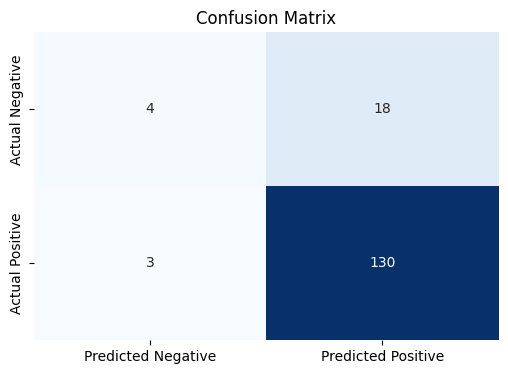

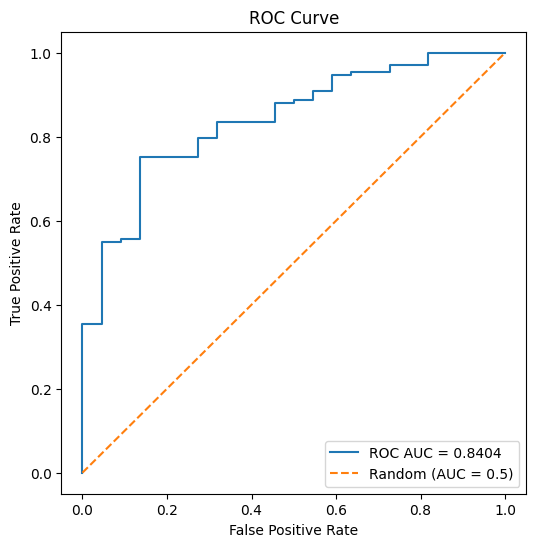

In [4]:
data_file = "../../data/annotated_videos/dataset_1679015606654767000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

### Test 2 - upsample with SMOTE

Training Balance for weight_transfer_type:
1    530
0    530
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8258
Precision: 0.8732
Recall: 0.9323
F1 Score: 0.9018
ROC AUC: 0.7666

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.18      0.23        22
           1       0.87      0.93      0.90       133

    accuracy                           0.83       155
   macro avg       0.59      0.56      0.57       155
weighted avg       0.79      0.83      0.81       155



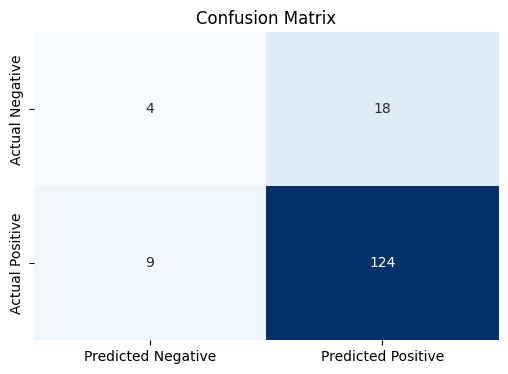

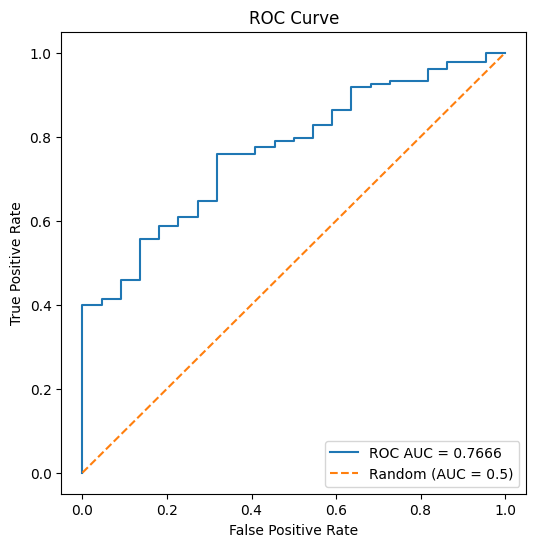

In [5]:
data_file = "../../data/annotated_videos/dataset_1679015606654767000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=True,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

### Test 3 - 10 frame window with flat column angles, randomly upsampled

Training Balance for weight_transfer_type:
0    2413
1    2413
Name: weight_transfer_type, dtype: int64
Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8793
Precision: 0.9016
Recall: 0.9633
F1 Score: 0.9314
ROC AUC: 0.8455
Matthews correlation coefficient (-1 to 1): 0.45015300682017967

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.40      0.50       105
           1       0.90      0.96      0.93       599

    accuracy                           0.88       704
   macro avg       0.78      0.68      0.71       704
weighted avg       0.86      0.88      0.87       704



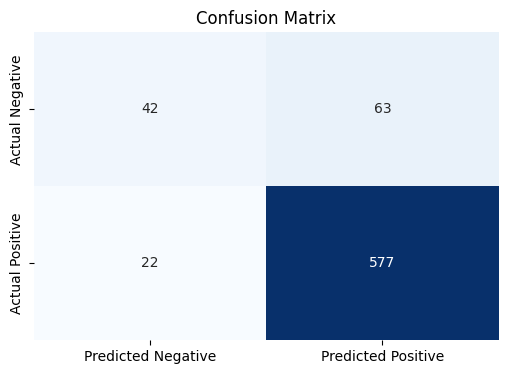

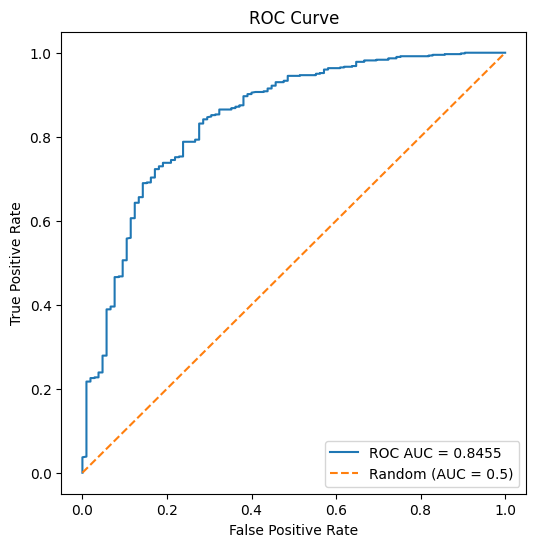

In [15]:
data_file = "../../data/annotated_videos/dataset_1679087888313443000.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

# Dataset 2
### Split on step type (full step example) with pooled features over the temporal window with normalized and nonnormalized angles and distances.

### Test 1 - target Step Type

Training Balance for step_type:
0    247
1    247
Name: step_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.9333
Precision: 0.8971
Recall: 0.9839
F1 Score: 0.9385
ROC AUC: 0.9892

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        58
           1       0.90      0.98      0.94        62

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



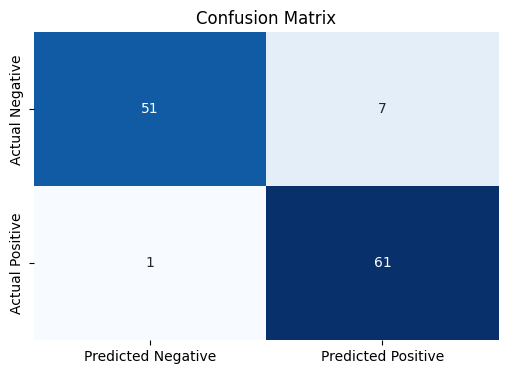

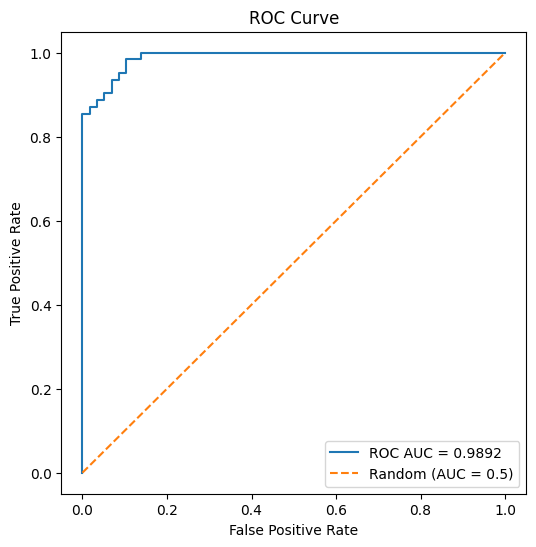

In [7]:
data_file = "../../data/annotated_videos/pooled_angles_distances_full_examples.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="step_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    # "class_weight": "balanced_subsample",
    # "class_weight": "balanced",
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_gradient_boost()
model_builder.evaluate_model()

Wow - seems like we can definitely predict left versus right step. Makes sense, the data should be different for sure.

### Test 2 - Compare with random forest

Here just trying the new dataset with a Random Forest predicting weight transfer type.

Training Balance for weight_transfer_type:
1    413
0    413
Name: weight_transfer_type, dtype: int64
Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Top 5 features
{'angles_std.right_elbow_right_wrist_to_plumb_line_angle_2d_degrees': '2.8711248015151885%'}
{'angles_max.left_shoulder_left_elbow_to_right_elbow_right_wrist_angle_2d_degrees': '2.331494343140565%'}
{'angles_avg.left_shoulder_left_elbow_to_right_elbow_right_wrist_angle_2d_degrees': '2.1473591983070346%'}
{'angles_max.right_elbow_right_wrist_to_plumb_line_angle_2d_degrees': '1.6938453284032275%'}
{'angles_std.neck_mid_hip_to_plumb_line_angle_2d_degrees': '1.4820418998498956%'}
Classification Metrics:
Accuracy: 0.8833
Precision: 0.9130
Recall: 0.9633
F1 Score: 0.9375
ROC AUC: 0.6972

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.09      0.13        11
           1       0.91      0.96     

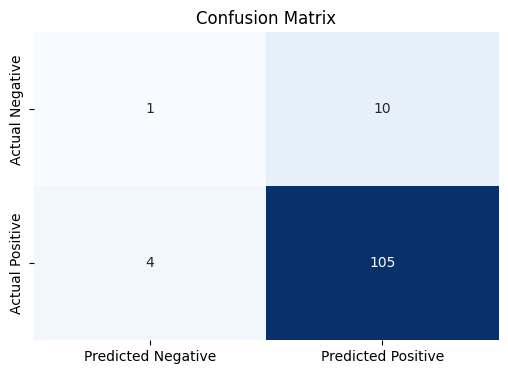

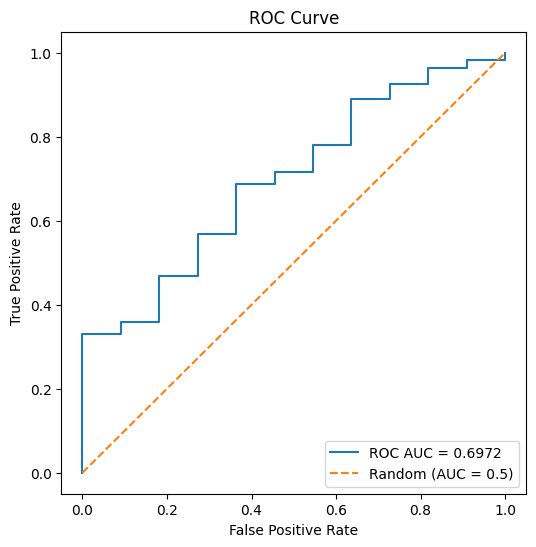

In [5]:
data_file = "../../data/annotated_videos/pooled_angles_distances_full_examples.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)
# model_builder.run_pca(num_components=200)

param_dist = {
    "n_estimators": randint(400, 600),
    "max_depth": randint(9, 15),
    "max_features": randint(4, 12),
}
rf_params = {
    "n_estimators": 600,
    "max_depth": 9,
    "max_leaf_nodes": 63,
}

model_builder.train_random_forest(params= rf_params)
model_builder.evaluate_model()

### Test 3 - Same Dataset, with Gradient Boost

Training Balance for weight_transfer_type:
1    413
0    413
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8917
Precision: 0.9211
Recall: 0.9633
F1 Score: 0.9417
ROC AUC: 0.6889

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.18      0.24        11
           1       0.92      0.96      0.94       109

    accuracy                           0.89       120
   macro avg       0.63      0.57      0.59       120
weighted avg       0.87      0.89      0.88       120



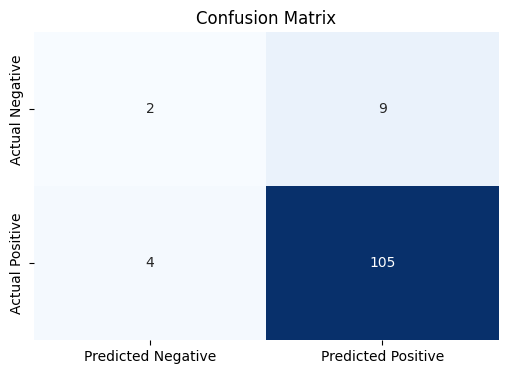

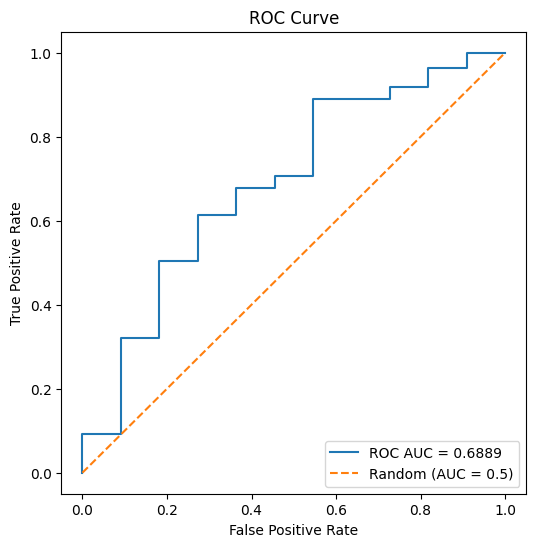

In [6]:
data_file = "../../data/annotated_videos/pooled_angles_distances_full_examples.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()

## Dataset 3

## This dataset is Pooled Angles and Distances using the last 10 frames from the identified end of a complete example as opposed to pulling ten frames from within some example

### Test 1 - randomly upsample minority class, gradient boost

Training Balance for weight_transfer_type:
1    413
0    413
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8917
Precision: 0.9211
Recall: 0.9633
F1 Score: 0.9417
ROC AUC: 0.6889

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.18      0.24        11
           1       0.92      0.96      0.94       109

    accuracy                           0.89       120
   macro avg       0.63      0.57      0.59       120
weighted avg       0.87      0.89      0.88       120



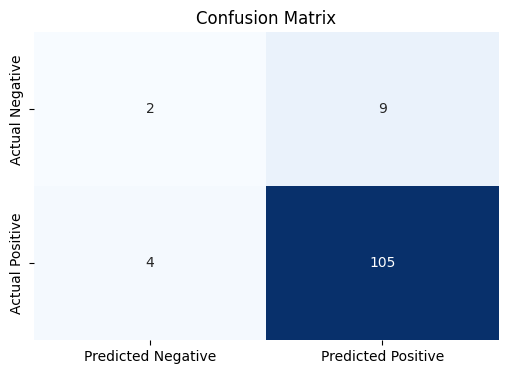

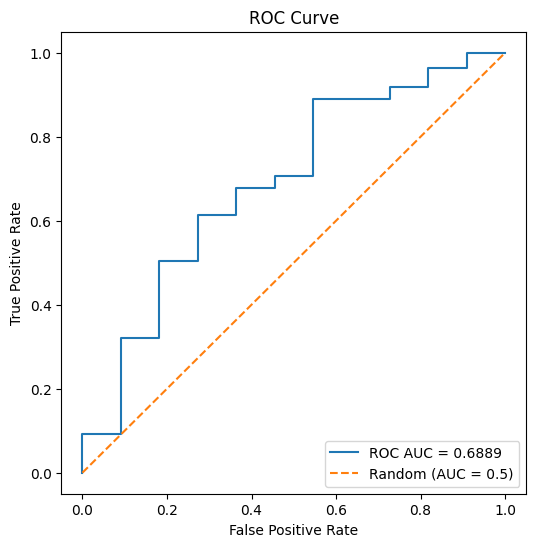

In [11]:
data_file = "../../data/annotated_videos/pooled_angles_distances_last_10_frames.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()

# Dataset 4
## Flattened columns on 10 frames from the end of complete example (as opposed to arbitrary section of end-frame-labeled example)

### Test 1 - Gradient Boost w/o upsample

Training Balance for weight_transfer_type:
1    414
0     66
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.9167
Precision: 0.9459
Recall: 0.9633
F1 Score: 0.9545
ROC AUC: 0.8157

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.95      0.96      0.95       109

    accuracy                           0.92       120
   macro avg       0.75      0.71      0.73       120
weighted avg       0.91      0.92      0.91       120



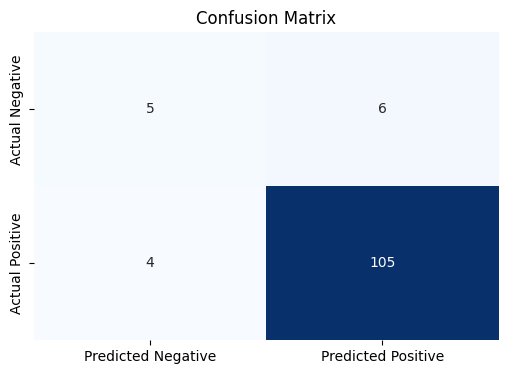

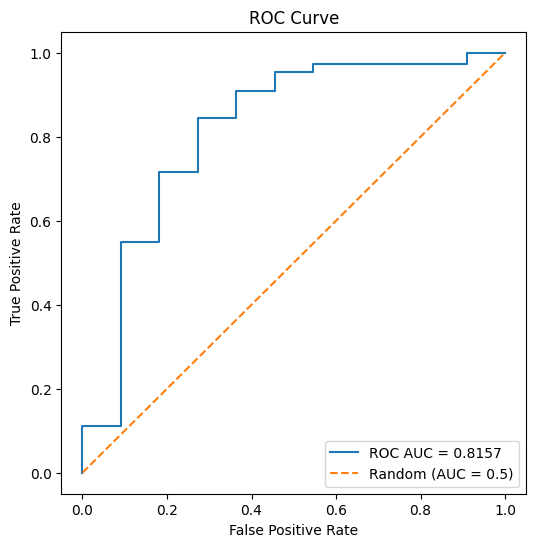

In [17]:
data_file = "../../data/annotated_videos/flatten_on_example_10_frames.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=False,
    upsample_minority=False,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()

### Test 2 - Gradient Boost w/ Minority Upsample

Training Balance for weight_transfer_type:
1    414
0    414
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.9000
Precision: 0.9533
Recall: 0.9358
F1 Score: 0.9444
ROC AUC: 0.8115

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.95      0.94      0.94       109

    accuracy                           0.90       120
   macro avg       0.71      0.74      0.72       120
weighted avg       0.91      0.90      0.90       120



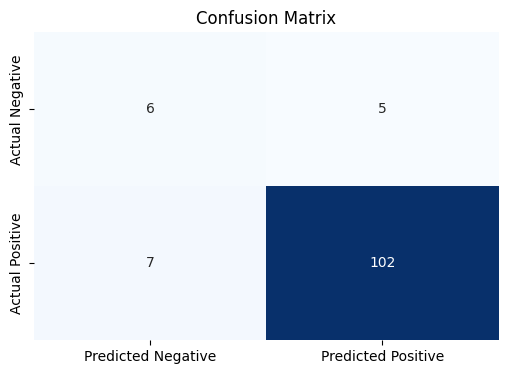

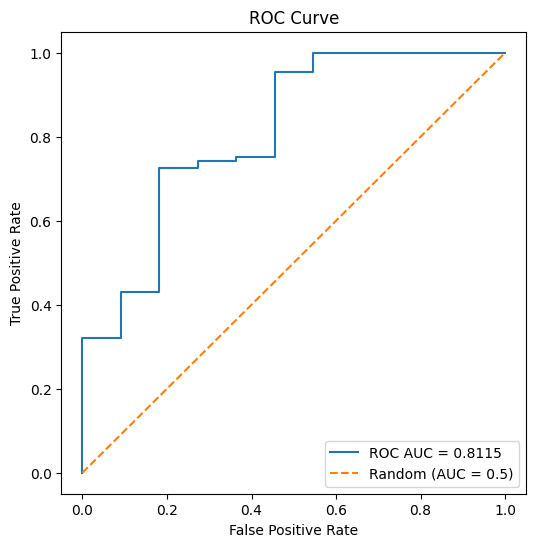

In [16]:
data_file = "../../data/annotated_videos/flatten_on_example_10_frames.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()

# Dataset 5
## Flattened columns on 25 frames from the end of complete example (as opposed to arbitrary section of end-frame-labeled example)

### Test 1 - minority upsample

Training Balance for weight_transfer_type:
1    417
0    417
Name: weight_transfer_type, dtype: int64


/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/Caskroom/miniconda/base/envs/pose_parser/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8417
Precision: 0.8829
Recall: 0.9423
F1 Score: 0.9116
ROC AUC: 0.6707

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        16
           1       0.88      0.94      0.91       104

    accuracy                           0.84       120
   macro avg       0.61      0.56      0.58       120
weighted avg       0.81      0.84      0.82       120



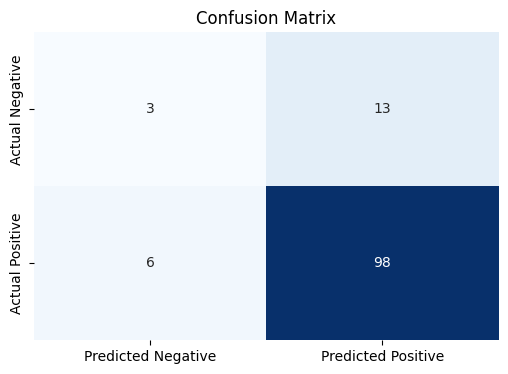

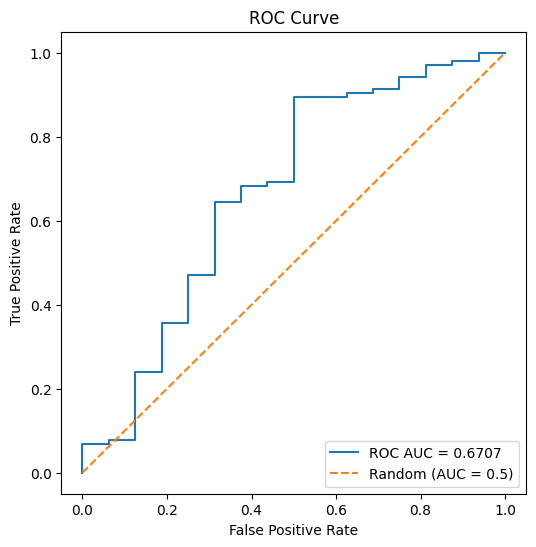

In [15]:
data_file = "../../data/annotated_videos/flatten_on_example_25_frames.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()

### Test 2 - no upsample

Training Balance for weight_transfer_type:
1    417
0     59
Name: weight_transfer_type, dtype: int64
Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8500
Precision: 0.8772
Recall: 0.9615
F1 Score: 0.9174
ROC AUC: 0.6346
Matthews correlation coefficient (-1 to 1): 0.13497638119975428

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.12      0.18        16
           1       0.88      0.96      0.92       104

    accuracy                           0.85       120
   macro avg       0.61      0.54      0.55       120
weighted avg       0.80      0.85      0.82       120



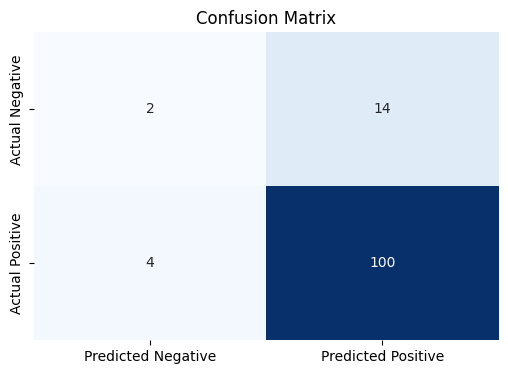

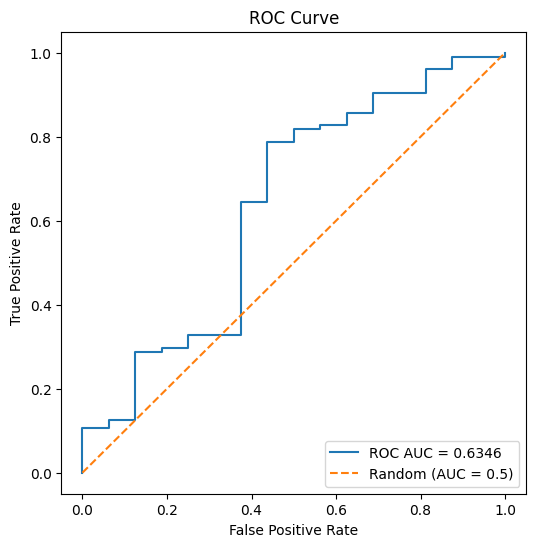

In [20]:
data_file = "../../data/annotated_videos/flatten_on_example_25_frames.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=False,
    upsample_minority=False,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()

## Dataset 6
### Contrast enhanced video - preprocessed frames before keypoint extraction.
### 25 frame window, flattened

Here, want to do some of the same tests above but comparing with a preprocessed video dataset.

# Test 1 - minority upsample

Training Balance for weight_transfer_type:
1    418
0    418
Name: weight_transfer_type, dtype: int64
Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8583
Precision: 0.8783
Recall: 0.9712
F1 Score: 0.9224
ROC AUC: 0.7915
Matthews correlation coefficient (-1 to 1): 0.16357216402190614

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.88      0.97      0.92       104

    accuracy                           0.86       120
   macro avg       0.64      0.55      0.56       120
weighted avg       0.81      0.86      0.82       120



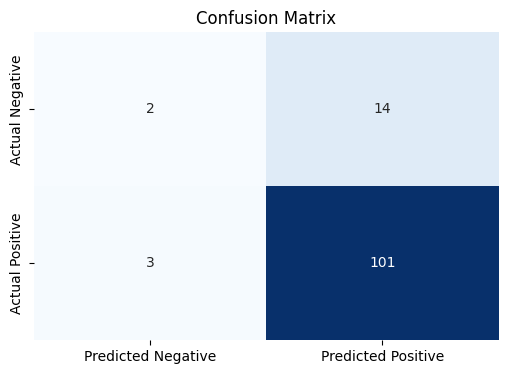

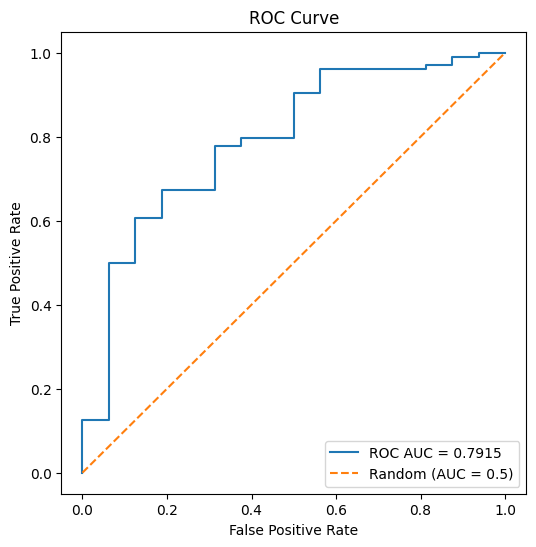

In [18]:
data_file = "../../data/annotated_videos/preprocessed_flatten_on_example_25_frames_2.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=True,
    upsample_minority=True,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()

### Test 2 - preprocesed without upsample

Training Balance for weight_transfer_type:
1    418
0     59
Name: weight_transfer_type, dtype: int64
Mean ROC AUC from cross validation: 1.000
Min ROC AUC from cross validation: 1.000
Max ROC AUC from cross validation: 1.000
Classification Metrics:
Accuracy: 0.8583
Precision: 0.8783
Recall: 0.9712
F1 Score: 0.9224
ROC AUC: 0.7536
Matthews correlation coefficient (-1 to 1): 0.16357216402190614

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.88      0.97      0.92       104

    accuracy                           0.86       120
   macro avg       0.64      0.55      0.56       120
weighted avg       0.81      0.86      0.82       120



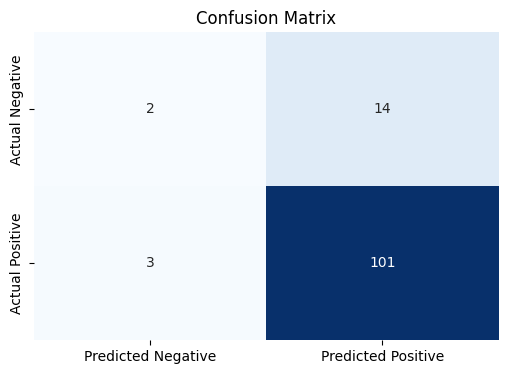

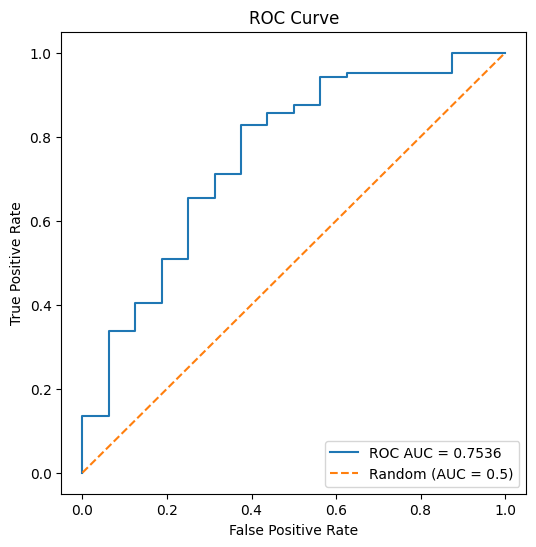

In [19]:
data_file = "../../data/annotated_videos/preprocessed_flatten_on_example_25_frames_2.csv"
column_whitelist = []

# reload model builder class (iterating on it a lot)
importlib.reload(mb)
model_builder = mb.ModelBuilder()

model_builder.load_and_prep_dataset_from_csv(
    path=data_file,
    target="weight_transfer_type",
    value_map=value_map,
    column_whitelist=column_whitelist,
    drop_list=drop_list,
)

model_builder.set_train_test_split(
    balance_off_target=False,
    upsample_minority=False,
    downsample_majority=False,
    use_SMOTE=False,
    random_state=40002,
)

model_builder.train_gradient_boost()
model_builder.evaluate_model()

# Save current model and related data to files

In [16]:
""" WRITE NOTES ON THIS RUN HERE """
notes = """
Gradient Boost classifier trained on dataset dataset_1679087888313443000, a 10 frame window with flat column angles, and randomly upsampled
    """

model_builder.save_model_and_datasets(notes=notes, model_type="gradient-boost")

Saved model to pickle!
